**first step is to import libraries we gonna need for our analysis and model predicting**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


This dataset is available on the "UCI Machine Learning Repository", all details are available at this link. This dataset contains 20 attributes and 1000 observations as well as an assessment of whether an application is considered as good or bad credit risk. for the trainig model Data will be split 70% for Model Calibration (train data), and 30% for Model Validation (test data).

the description of the data can find on this link https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29?msclkid=130a8ccecf0511ec8b11da06a823e880


In [ ]:
data = pd.read_csv('CreditData.csv')

# Removing duplicate rows if any
print('Shape before deleting duplicate values:', data.shape)
data=data.drop_duplicates()
print('Shape After deleting duplicate values:', data.shape)

data.head()

Shape before deleting duplicate values: (1000, 21)
Shape After deleting duplicate values: (1000, 21)


,chk_status,mth_duration,credit_history,purpose,credit_amount,saving,employ_time,pct_dpi,status_gender,other_debts,...,property,age,other_installments,housing,existing_credits,job,dependents_num,phone,foreign,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   chk_status          1000 non-null   object
 1   mth_duration        1000 non-null   int64 
 2   credit_history      1000 non-null   object
 3   purpose             1000 non-null   object
 4   credit_amount       1000 non-null   int64 
 5   saving              1000 non-null   object
 6   employ_time         1000 non-null   object
 7   pct_dpi             1000 non-null   int64 
 8   status_gender       1000 non-null   object
 9   other_debts         1000 non-null   object
 10  residency_time      1000 non-null   int64 
 11  property            1000 non-null   object
 12  age                 1000 non-null   int64 
 13  other_installments  1000 non-null   object
 14  housing             1000 non-null   object
 15  existing_credits    1000 non-null   int64 
 16  job                 1000 

In [ ]:
# decribing all our variable in the data
data.describe(include= 'all')

,chk_status,mth_duration,credit_history,purpose,credit_amount,saving,employ_time,pct_dpi,status_gender,other_debts,...,property,age,other_installments,housing,existing_credits,job,dependents_num,phone,foreign,class
count,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000,...,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000.000000
unique,4,NaN,5,10,NaN,5,5,NaN,4,3,...,4,NaN,3,3,NaN,4,NaN,2,2,NaN
top,A14,NaN,A32,A43,NaN,A61,A73,NaN,A93,A101,...,A123,NaN,A143,A152,NaN,A173,NaN,A191,A201,NaN
freq,394,NaN,530,280,NaN,603,339,NaN,548,907,...,332,NaN,814,713,NaN,630,NaN,596,963,NaN
mean,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,NaN,NaN,...,NaN,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN,1.300000
std,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,NaN,NaN,...,NaN,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN,0.458487
min,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,NaN,NaN,...,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,1.000000
25%,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,NaN,NaN,...,NaN,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,1.000000
50%,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,NaN,NaN,...,NaN,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,1.000000
75%,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,NaN,NaN,...,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN,2.000000


In [ ]:
# number of value that each variable contain
data.nunique()

chk_status              4
mth_duration           33
credit_history          5
purpose                10
credit_amount         921
saving                  5
employ_time             5
pct_dpi                 4
status_gender           4
other_debts             3
residency_time          4
property                4
age                    53
other_installments      3
housing                 3
existing_credits        4
job                     4
dependents_num          2
phone                   2
foreign                 2
class                   2
dtype: int64

**Since we already know the working context of the problem, this is the first stage of solving the problem. In this step, we get to know the dataset very well. Data structure there is a total of 21 attributes in the dataset,
their descriptions and details have been tabulated in the code above.**

In [ ]:
data['class'].head()

0    1
1    2
2    1
3    1
4    2
Name: class, dtype: int64

In [ ]:
# data['class'] = data['class'].apply(lambda x: 'good' if x == 1 else 'bad')

In [ ]:
data['class'].head()

0    1
1    2
2    1
3    1
4    2
Name: class, dtype: int64

**The attribute "class" it is our predictive variable, in the code above we will try to convert the numeric value to categorical as "good" and "bad".**

In [ ]:
# defining numerical variable
data_numeric = data.select_dtypes(include=[np.number])
numeric_cols = data_numeric.columns.values
print(numeric_cols)

['mth_duration' 'credit_amount' 'pct_dpi' 'residency_time' 'age'
 'existing_credits' 'dependents_num' 'class']


In [ ]:
# defining categorical variable
data_categorical = data.select_dtypes(exclude=[np.number])
categorical_cols = data_categorical.columns.values
print(categorical_cols)

['chk_status' 'credit_history' 'purpose' 'saving' 'employ_time'
 'status_gender' 'other_debts' 'property' 'other_installments' 'housing'
 'job' 'phone' 'foreign']


**The above code defines numerical and categorical variables.**

# Cleansing Data and define Missing Data 

In [ ]:
# calculating number of missing value 
for col in data.columns:
    pct_missing= np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

chk_status - 0%
mth_duration - 0%
credit_history - 0%
purpose - 0%
credit_amount - 0%
saving - 0%
employ_time - 0%
pct_dpi - 0%
status_gender - 0%
other_debts - 0%
residency_time - 0%
property - 0%
age - 0%
other_installments - 0%
housing - 0%
existing_credits - 0%
job - 0%
dependents_num - 0%
phone - 0%
foreign - 0%
class - 0%


*This* produces a list above showing the percentage of missing values for each of the features. However, in our case, the dataset we selected has no missing values and it is already been ordered clean and 
it is ready to use.

# Exploring the data

In [ ]:
data['class'].value_counts()

1    700
2    300
Name: class, dtype: int64

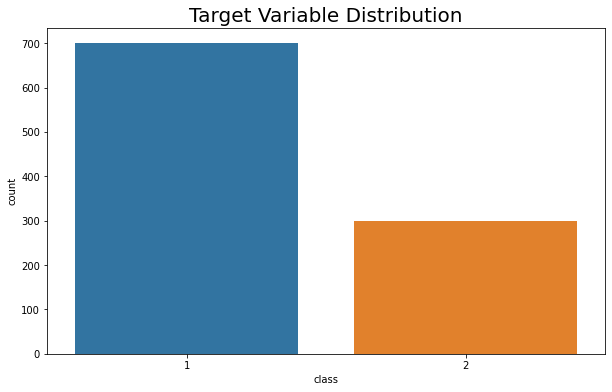

In [ ]:
# ploting number of good credit and bad credit
plt.figure(figsize=(10, 6))
sns.countplot(data= data, x= 'class')
plt.title("Target Variable Distribution", fontsize= 20)
plt.show()

**From the above description, We have balanced data representing 700 cases where an applicant is rated as good and other 300 instances where an applicant was classified as bad**

**Now that we have the data, we must first comprehend it before attempting to model it. First let's look at some descriptive stats for some numeric attributes like credit amount, age, and months duration.**

In [ ]:
data.mth_duration.describe()

count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: mth_duration, dtype: float64

In [ ]:
data.age.describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: age, dtype: float64

In [ ]:
data.credit_amount.describe()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: credit_amount, dtype: float64

### Relationship exploration: Categorical Vs Categorical

In [ ]:
# Cross tablulation between two categorical variables class and saving
pd.crosstab(data['class'], data['saving'], margins=True)

saving,A61,A62,A63,A64,A65,All
class,,,,,,
1,386,69,52,42,151,700
2,217,34,11,6,32,300
All,603,103,63,48,183,1000


In [ ]:
# Cross tablulation between two categorical variables class and status gender
pd.crosstab(data['class'], data['status_gender'], margins=True)

status_gender,A91,A92,A93,A94,All
class,,,,,
1,30,201,402,67,700
2,20,109,146,25,300
All,50,310,548,92,1000


In [ ]:
# Cross tablulation between two categorical variables class and dependents
pd.crosstab(data['class'], data['dependents_num'], margins=True)

dependents_num,1,2,All
class,,,
1,591,109,700
2,254,46,300
All,845,155,1000


**If we look at the results above, we will find that there is a heavy dependence on personal status and savings versus class. It also shows us that the number of dependents has no effect on class. It's generally safe to say that people who are hell-bent on maintaining their class keep their status no matter how many dependents they have.**

#### Visualize distribution of all the Continuous Predictor variables in the data using histograms

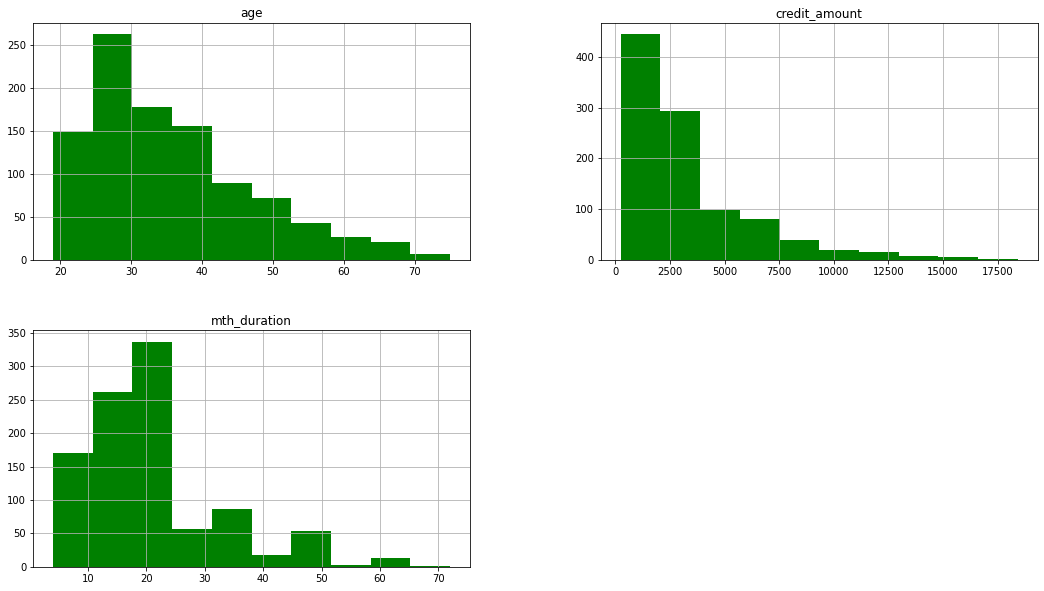

In [ ]:
# Plotting histograms of multiple columns together
# Observe that ApplicantIncome and CoapplicantIncome has outliers
data.hist(['age', 'credit_amount','mth_duration'], color='green', figsize=(18,10))
plt.show()

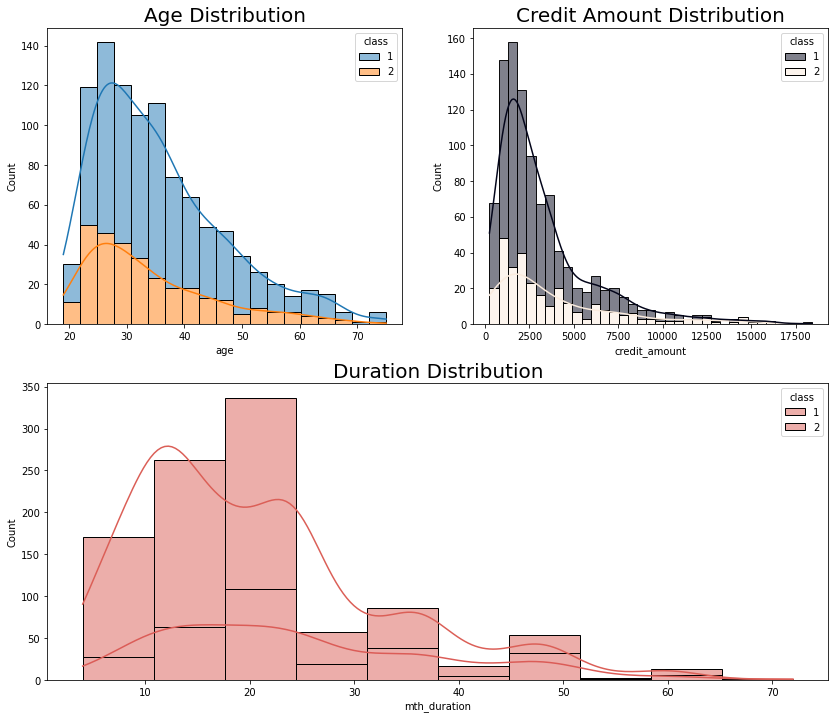

In [ ]:
plt.figure(figsize=(14, 12))

plt.subplot(221)
ax1 = sns.histplot(data=data, x='age', hue='class', multiple='stack', palette='tab10', kde=True)
ax1.set_title("Age Distribution", fontsize=20)

plt.subplot(222)
ax2 = sns.histplot(data=data, x='credit_amount', hue='class', multiple='stack', palette='rocket', kde=True)
ax2.set_title("Credit Amount Distribution", fontsize=20)

plt.subplot(212)
ax3 = sns.histplot(data=data, x='mth_duration', hue='class', multiple='stack', palette='hls', kde=True, bins=10)
ax3.set_title("Duration Distribution", fontsize=20)

plt.show()

###Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test


In [ ]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results: \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [ ]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['age', 'credit_amount','mth_duration']
FunctionAnova(inpData=data, TargetVariable='class', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results: 

age is correlated with class | P-Value: 0.003925339398278295
credit_amount is correlated with class | P-Value: 8.797572373533373e-07
mth_duration is correlated with class | P-Value: 6.488049877187189e-12


['age', 'credit_amount', 'mth_duration']

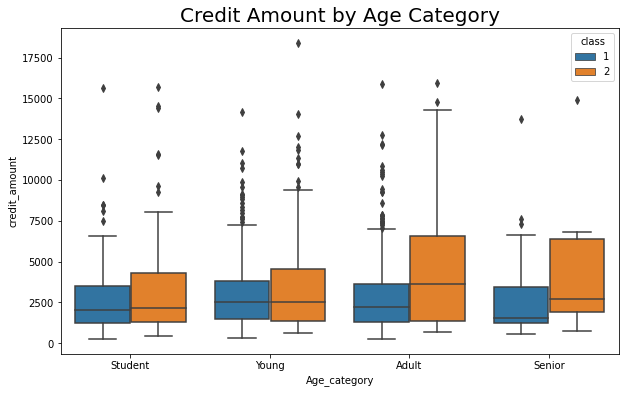

In [ ]:
#Let's look at the Credit Amount column by age category
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
data["Age_category"] = pd.cut(data.age, interval, labels=cats)


df_good = data[data["class"] == 'good']
df_bad = data[data["class"] == 'bad']

plt.figure(figsize=(10, 6))
plt.title("Credit Amount by Age Category", fontsize=20)
sns.boxplot(data=data, x='Age_category', y='credit_amount', hue='class')
plt.show()

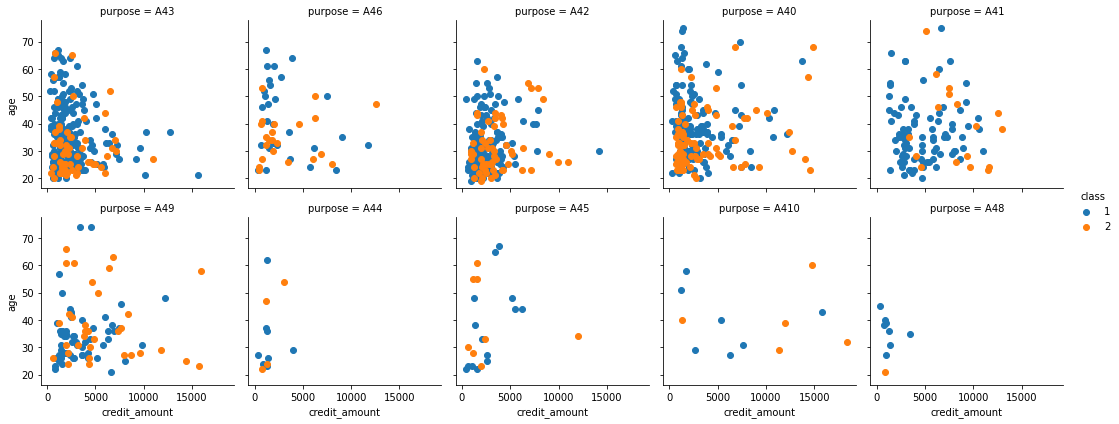

In [ ]:
grid = sns.FacetGrid(data, col='purpose', hue='class', col_wrap=5)
grid.map(plt.scatter, 'credit_amount', 'age')
grid.add_legend()
plt.show()

**The figure above illustrate for us that the majority of loans are for the purchase of new cars (A40), furniture and 
equipment (A42), and radio and television (A43). Also, if we note in the category (A41), which is related 
to used cars, that the percentage of purchase is very weak and with a bad rating! It is also not surprising to 
see a decrease in a person's age and an increase in the value of the loan are associated with bad credit.**

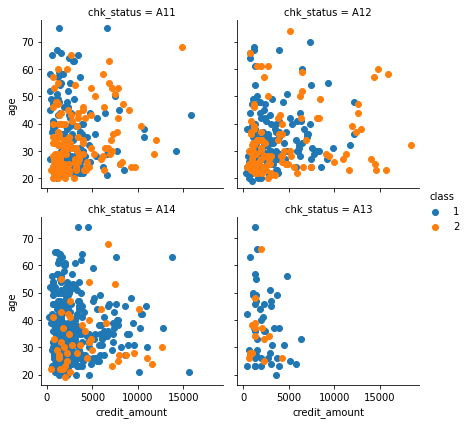

In [ ]:
grid = sns.FacetGrid(data, col='chk_status', hue='class', col_wrap=2)
grid.map(plt.scatter, 'credit_amount', 'age')
grid.add_legend()
plt.show()

In [ ]:
'A95' in data['status_gender']

False

**If we note in Figure above, the first thing we notice is the complete absence of data for single women (A95). We 
don't know if it's because single girls don't apply for loans or if it's because data is missing, although the 
first possibility seems unlikely in real life. This is what turned out after applying this code ("A95" %in% 
german_data$personal_status >>> FALSE) which is we do not have the data about single women. As for 
the unmarried males (A 93), the data showed that this category borrows at a large percentage, and the 
younger the age, the higher the loan amount, and the rating is bad. (A 92) For females: divorced, separated 
and married. The data in this category shows that the higher the age, the lower the loan amount, the good 
credit rating and the bad rating gradually becoming absent. For (A91), (A94) Males who are divorced, 
separated, married, or widowed have the lowest percentage of loans in this group. This leads us to have 
difficulty noticing any trends either in terms of good or bad ratings.**

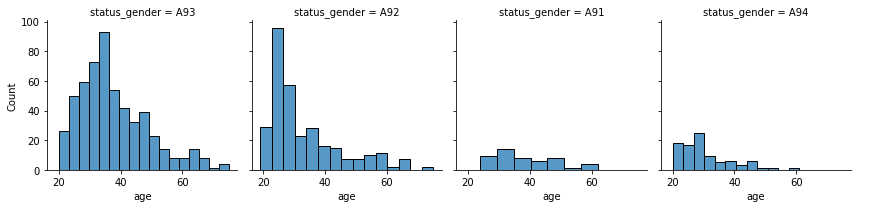

In [ ]:
grid = sns.FacetGrid(data, col='status_gender')
grid.map(sns.histplot, 'age')
grid.add_legend()
plt.show()

**In figure above the results shows that practically all personality and gender categories have a normal skewed 
tendency, with age 30 being the most loaned category compared to the other categories.**

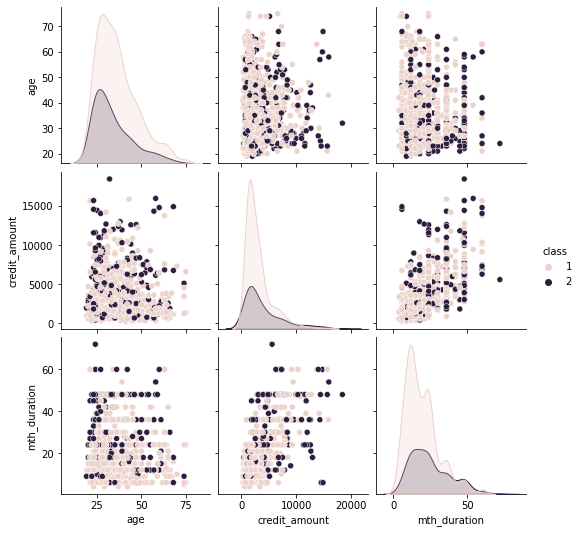

In [ ]:
num_cat_risk = ['age', 'credit_amount', 'mth_duration', 'class']
sns.pairplot(data[num_cat_risk], hue="class")
plt.show()



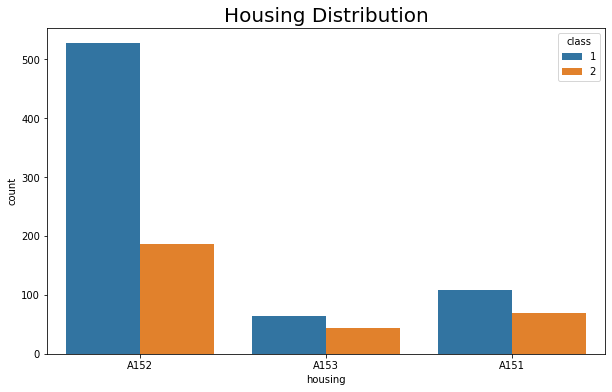

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='housing', hue='class')
plt.title("Housing Distribution", fontsize=20)
plt.show()

In [ ]:
# import plotly.figure_factory as ff

# # it's a library that we work with plotly
# import plotly.offline as py 
# import numpy as np

# # Add histogram data
# x1 = np.log(df_good['credit_amount']) 
# x2 = np.log(df_bad['credit_amount'])

# # Group data together
# hist_data = [x1, x2]

# group_labels = ['Good Credit', 'Bad Credit']

# # Create distplot with custom bin_size
# fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)

# # Plot!
# py.iplot(fig, filename='Distplot with Multiple Datasets')

In [ ]:
data.columns

Index(['chk_status', 'mth_duration', 'credit_history', 'purpose',
       'credit_amount', 'saving', 'employ_time', 'pct_dpi', 'status_gender',
       'other_debts', 'residency_time', 'property', 'age',
       'other_installments', 'housing', 'existing_credits', 'job',
       'dependents_num', 'phone', 'foreign', 'class', 'Age_category'],
      dtype='object')

# Selecting final predictors for Machine Learning
**Based on the above tests, selecting the final columns for machine learning**

In [ ]:
SelectedColumns=['chk_status','credit_history','purpose','saving','employ_time',
 'status_gender','other_debts','property','other_installments','housing','foreign',
 'age', 'credit_amount', 'mth_duration']

# Selecting final columns
DataForML=data[SelectedColumns]
DataForML.head()

,chk_status,credit_history,purpose,saving,employ_time,status_gender,other_debts,property,other_installments,housing,foreign,age,credit_amount,mth_duration
0,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A201,67,1169,6
1,A12,A32,A43,A61,A73,A92,A101,A121,A143,A152,A201,22,5951,48
2,A14,A34,A46,A61,A74,A93,A101,A121,A143,A152,A201,49,2096,12
3,A11,A32,A42,A61,A74,A93,A103,A122,A143,A153,A201,45,7882,42
4,A11,A33,A40,A61,A73,A93,A101,A124,A143,A153,A201,53,4870,24


In [ ]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

# Data Pre-processing for Machine Learning

### Converting Ordinal variables to numeric using business mapping


In [ ]:
# Treating the Ordinal variable first
DataForML['employ_time'].replace({'A71':1, 'A72':2,'A73':3, 'A74':4,'A75':5 }, inplace=True)

###Converting the binary nominal variable to numeric using 1/0 mapping

In [ ]:
# Treating the binary nominal variable
DataForML['foreign'].replace({'A201':1, 'A202':0}, inplace=True)

# Looking at data after nominal treatment
DataForML.head()

,chk_status,credit_history,purpose,saving,employ_time,status_gender,other_debts,property,other_installments,housing,foreign,age,credit_amount,mth_duration
0,A11,A34,A43,A65,5,A93,A101,A121,A143,A152,1,67,1169,6
1,A12,A32,A43,A61,3,A92,A101,A121,A143,A152,1,22,5951,48
2,A14,A34,A46,A61,4,A93,A101,A121,A143,A152,1,49,2096,12
3,A11,A32,A42,A61,4,A93,A103,A122,A143,A153,1,45,7882,42
4,A11,A33,A40,A61,3,A93,A101,A124,A143,A153,1,53,4870,24


### Converting nominal variables to numeric using get_dummies()

In [ ]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['class']=data['class']

# Printing sample rows
DataForML_Numeric.head()

,employ_time,foreign,age,credit_amount,mth_duration,chk_status_A11,chk_status_A12,chk_status_A13,chk_status_A14,credit_history_A30,...,property_A122,property_A123,property_A124,other_installments_A141,other_installments_A142,other_installments_A143,housing_A151,housing_A152,housing_A153,class
0,5,1,67,1169,6,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,3,1,22,5951,48,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,2
2,4,1,49,2096,12,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1
3,4,1,45,7882,42,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,1
4,3,1,53,4870,24,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,2


#Machine Learning: Splitting the data into Training and Testing sample
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [ ]:
DataForML_Numeric.columns

Index(['employ_time', 'foreign', 'age', 'credit_amount', 'mth_duration',
       'chk_status_A11', 'chk_status_A12', 'chk_status_A13', 'chk_status_A14',
       'credit_history_A30', 'credit_history_A31', 'credit_history_A32',
       'credit_history_A33', 'credit_history_A34', 'purpose_A40',
       'purpose_A41', 'purpose_A410', 'purpose_A42', 'purpose_A43',
       'purpose_A44', 'purpose_A45', 'purpose_A46', 'purpose_A48',
       'purpose_A49', 'saving_A61', 'saving_A62', 'saving_A63', 'saving_A64',
       'saving_A65', 'status_gender_A91', 'status_gender_A92',
       'status_gender_A93', 'status_gender_A94', 'other_debts_A101',
       'other_debts_A102', 'other_debts_A103', 'property_A121',
       'property_A122', 'property_A123', 'property_A124',
       'other_installments_A141', 'other_installments_A142',
       'other_installments_A143', 'housing_A151', 'housing_A152',
       'housing_A153', 'class'],
      dtype='object')

In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable='class'
Predictors=['employ_time', 'foreign', 'age', 'credit_amount', 'mth_duration',
       'chk_status_A11', 'chk_status_A12', 'chk_status_A13', 'chk_status_A14',
       'credit_history_A30', 'credit_history_A31', 'credit_history_A32',
       'credit_history_A33', 'credit_history_A34', 'purpose_A40',
       'purpose_A41', 'purpose_A410', 'purpose_A42', 'purpose_A43',
       'purpose_A44', 'purpose_A45', 'purpose_A46', 'purpose_A48',
       'purpose_A49', 'saving_A61', 'saving_A62', 'saving_A63', 'saving_A64',
       'saving_A65', 'status_gender_A91', 'status_gender_A92',
       'status_gender_A93', 'status_gender_A94', 'other_debts_A101',
       'other_debts_A102', 'other_debts_A103', 'property_A121',
       'property_A122', 'property_A123', 'property_A124',
       'other_installments_A141', 'other_installments_A142',
       'other_installments_A143', 'housing_A151', 'housing_A152',
       'housing_A153']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [ ]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(700, 46)
(700,)
(300, 46)
(300,)


In [ ]:
# Support Vector Machines(SVM)
from sklearn import svm
clf = svm.SVC(C=2, kernel='rbf', gamma=0.1)

# Printing all the parameters of SVM
print(clf)

# Creating the model on Training Data
SVM=clf.fit(X_train,y_train)
prediction=SVM.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(SVM, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

SVC(C=2, gamma=0.1)
              precision    recall  f1-score   support

           1       0.78      0.89      0.83       209
           2       0.61      0.42      0.50        91

    accuracy                           0.74       300
   macro avg       0.70      0.65      0.66       300
weighted avg       0.73      0.74      0.73       300

[[185  24]
 [ 53  38]]
Accuracy of the model on Testing Sample Data: 0.73

Accuracy values for 10-fold Cross Validation:
 [0.76987902 0.69775382 0.73089802 0.76533333 0.77229833 0.76118421
 0.70133333 0.80197664 0.79002079 0.74604343]

Final Average Accuracy of the model: 0.75


In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable='class'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['employ_time', 'age', 'credit_amount', 'mth_duration',
       'chk_status_A11', 'chk_status_A12', 'chk_status_A13', 'chk_status_A14',
       'credit_history_A30', 'credit_history_A31', 'credit_history_A32',
       'credit_history_A33', 'credit_history_A34', 'purpose_A40',
       'purpose_A41', 'purpose_A410', 'purpose_A42', 'purpose_A43',
       'purpose_A44', 'purpose_A45', 'purpose_A46', 'purpose_A48',
       'purpose_A49', 'saving_A61', 'saving_A62', 'saving_A63', 'saving_A64',
       'saving_A65', 'status_gender_A91', 'status_gender_A92',
       'status_gender_A93', 'status_gender_A94']

       

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(1000, 32)
(1000,)


In [ ]:
# Using the SVM algorithm with final hyperparamters
from sklearn import svm
clf = svm.SVC(C=4, kernel='rbf', gamma=0.1)

# Training the model on 100% Data available
Final_SVM_Model=clf.fit(X,y)

In [ ]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(Final_SVM_Model, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.795594   0.68       0.72238245 0.72867133 0.73089802 0.77407758
 0.66879756 0.80197664 0.73104474 0.74802495]

Final Average Accuracy of the model: 0.74


In [ ]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final ZomatoRatingModel
with open('Final_SVM_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_SVM_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: \\uos-learner\bh98hu\Downloads\cetm-46


In [ ]:
# This Function can be called from any from any front end tool/website
def PredictLoanStatus(InputLoanDetails):
    Num_Inputs=InputLoanDetails.shape[0]
    
    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputLoanDetails=InputLoanDetails.append(DataForML)
    
    # Treating the Ordinal variable first
    InputLoanDetails['employ_time'].replace({'A71':1, 'A72':2,'A73':3, 'A74':4,'A75':5 }, inplace=True)
    
    # Generating dummy variables for rest of the nominal variables
    InputLoanDetails=pd.get_dummies(InputLoanDetails)
            
    # Maintaining the same order of columns as it was during the model training
    Predictors=['employ_time', 'age', 'credit_amount', 'mth_duration',
       'chk_status_A11', 'chk_status_A12', 'chk_status_A13', 'chk_status_A14',
       'credit_history_A30', 'credit_history_A31', 'credit_history_A32',
       'credit_history_A33', 'credit_history_A34', 'purpose_A40',
       'purpose_A41', 'purpose_A410', 'purpose_A42', 'purpose_A43',
       'purpose_A44', 'purpose_A45', 'purpose_A46', 'purpose_A48',
       'purpose_A49', 'saving_A61', 'saving_A62', 'saving_A63', 'saving_A64',
       'saving_A65', 'status_gender_A91', 'status_gender_A92',
       'status_gender_A93', 'status_gender_A94']
    
    # Generating the input values to the model
    X=InputLoanDetails[Predictors].values[0:Num_Inputs]
    
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)
    
    # Loading the Function from pickle file
    import pickle
    with open('Final_SVM_Model.pkl', 'rb') as fileReadStream:
        AdaBoost_model=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # Genrating Predictions
    Prediction=AdaBoost_model.predict(X)
    PredictedStatus=pd.DataFrame(Prediction, columns=['Predicted Status'])
    return(PredictedStatus)

In [ ]:
# Calling the function for some loan applications manually
NewLoanApplications=pd.DataFrame(
    data=[['A73',22,5951,48,'A12','A32','A43','A61','A92'],
          ['A72',40,8951,24,'A12','A32','A43','A61','A92']],
    
    columns=['employ_time', 'age', 'credit_amount', 'mth_duration','chk_status', 
             'credit_history', 'purpose', 'saving','status_gender'])

print(NewLoanApplications)

# Calling the Function for prediction
PredictLoanStatus(InputLoanDetails= NewLoanApplications)

  employ_time  age  credit_amount  mth_duration chk_status credit_history  \
0         A73   22           5951            48        A12            A32   
1         A72   40           8951            24        A12            A32   

  purpose saving status_gender  
0     A43    A61           A92  
1     A43    A61           A92  


,Predicted Status
0,2
1,1


# Function for predictions API

In [ ]:
# Creating the function which can take loan inputs and perform prediction
def FunctionLoanPrediction(inp_employ, inp_age , inp_amount, inp_duration,
                           inp_checkingstatus,inp_history, inp_purpose, 
                           inp_savings, inp_status):
    SampleInputData=pd.DataFrame(
     data=[[inp_employ, inp_age , inp_amount, inp_duration,
           inp_checkingstatus,inp_history, inp_purpose, inp_savings, inp_status]],
     columns=['employ_time', 'age', 'credit_amount', 'mth_duration','chk_status', 
             'credit_history', 'purpose', 'saving','status_gender'])

    # Calling the function defined above using the input parameters
    Predictions=PredictLoanStatus(InputLoanDetails= SampleInputData)

    # Returning the predicted loan status
    return(Predictions.to_json())

# Function call
FunctionLoanPrediction(inp_employ='A73', 
                       inp_age= 22, 
                       inp_amount=5951,
                       inp_duration=48,
                       inp_checkingstatus='A12',
                       inp_history='A32',
                       inp_purpose='A43',
                       inp_savings='A61',
                       inp_status='A92')

'{"Predicted Status":{"0":2}}'

In [ ]:
from flask import Flask,request,jsonify, render_template
import pickle
import pandas as pd
import numpy
import os
import json

app = Flask(__name__)

@app.route('/get_loan_prediction', methods=["GET"])
def get_loan_prediction():
    try:
        # Getting the paramters from API call
        employ_value = request.args.get('employ')
        age_value = float(request.args.get('age'))
        amount_value=float(request.args.get('amount'))
        duration_value=float(request.args.get('duration'))
        checkingstatus_value=request.args.get('checkingstatus')
        history_value=request.args.get('history')
        purpose_value=request.args.get('purpose')
        savings_value=request.args.get('savings')
        status_value=request.args.get('PropertyArea')
                
        # Calling the funtion to get loan approval status
        prediction_from_api=FunctionLoanPrediction(
                       inp_employ=employ_value, 
                       inp_age= age_value, 
                       inp_amount=amount_value,
                       inp_duration=duration_value,
                       inp_checkingstatus=checkingstatus_value,
                       inp_history=history_value,
                       inp_purpose=purpose_value,
                       inp_savings=savings_value,
                       inp_status=status_value)

        # Loadi the prediction result
        json_var = json.loads(prediction_from_api)
        json_result = json_var['Predicted Status']["0"] # Get the specific result 0 or 1 

        # Send a msg according to the json result number
        result_message = ""
        if json_result == 1:
            result_message = "Accepted"
        else: 
            result_message = "Rejected"

        return render_template('result.html', result=result_message)
    
    except Exception as e:
        return('Something is not right!:'+str(e))


@app.route("/")
def hello_word():
  return render_template('form.html')

if __name__ =="__main__":
    # app.run(debug=True)
    # Hosting the API in localhost
    app.run( host='127.0.0.1', port=8080, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:8080 (Press CTRL+C to quit)
127.0.0.1 - - [19/May/2022 06:08:41] "GET /get_loan_prediction?employ=A73&age=22&amount=9951&duration=48&checkingstatus=A12&history=A32&purpose=A43&savings=A61&status=A92 HTTP/1.1" 200 -
127.0.0.1 - - [19/May/2022 06:08:42] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [19/May/2022 06:09:06] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [19/May/2022 06:09:57] "GET / HTTP/1.1" 200 -
